### 목표
- 활성화함수와 경사하강법 조합에 따른 성능 비교

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [2]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


#### 1. sigmoid + SGD 조합

In [5]:
model = Sequential()
model.add(InputLayer(input_shape=(28,28))) #입력층
model.add(Flatten()) # 데이터를 1차원으로 펴주는 역활
model.add(Dense(units=64, activation='sigmoid'))
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dense(units=256, activation='sigmoid'))
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dense(units=10, activation='softmax')) #출력층(다중분류)
model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
# 'sparse_ : 정답을 확률로 안바꾸더라도 모델 내부에서 틀린정도를 계산해줌(정답원핫인코딩 안해도됨)
h1 = model.fit(X_train,y_train,epochs=200,validation_split=0.2)


Epoch 1/200
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3020 - accuracy: 0.1120 - val_loss: 2.2949 - val_accuracy: 0.1141
Epoch 2/200
1500/1500 [==============================] - 4s 3ms/step - loss: 2.2876 - accuracy: 0.1466 - val_loss: 2.2758 - val_accuracy: 0.3240
Epoch 3/200
1500/1500 [==============================] - 4s 3ms/step - loss: 2.2538 - accuracy: 0.2282 - val_loss: 2.2140 - val_accuracy: 0.2213
Epoch 4/200
1500/1500 [==============================] - 4s 3ms/step - loss: 2.0686 - accuracy: 0.3018 - val_loss: 1.8358 - val_accuracy: 0.2861
Epoch 5/200
1500/1500 [==============================] - 4s 3ms/step - loss: 1.6773 - accuracy: 0.3530 - val_loss: 1.5596 - val_accuracy: 0.3747
Epoch 6/200
1500/1500 [==============================] - 4s 3ms/step - loss: 1.4604 - accuracy: 0.4276 - val_loss: 1.3655 - val_accuracy: 0.4179
Epoch 7/200
1500/1500 [==============================] - 4s 3ms/step - loss: 1.3015 - accuracy: 0.4930 - val_loss: 1.2372 - val_ac

#### 2. relu + SGD 조합

In [6]:
model2 = Sequential()
model2.add(InputLayer(input_shape=(28,28))) #입력층
model2.add(Flatten()) # 데이터를 1차원으로 펴주는 역활
model2.add(Dense(units=64, activation='relu'))
model2.add(Dense(units=128, activation='relu'))
model2.add(Dense(units=256, activation='relu'))
model2.add(Dense(units=128, activation='sigmoid'))  # 층이 얕으면 오차가 그대로 전달되서 학습이 잘 안될수도 있으므로 하나는 sigmoid로
model2.add(Dense(units=10, activation='softmax')) #출력층(다중분류)
model2.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
# 'sparse_ : 정답을 확률로 안바꾸더라도 모델 내부에서 틀린정도를 계산해줌(정답원핫인코딩 안해도됨)
h2 = model2.fit(X_train,y_train,epochs=200,validation_split=0.2)

Epoch 1/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8005 - accuracy: 0.7298 - val_loss: 0.5733 - val_accuracy: 0.7971
Epoch 2/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5173 - accuracy: 0.8172 - val_loss: 0.4917 - val_accuracy: 0.8284
Epoch 3/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4596 - accuracy: 0.8370 - val_loss: 0.4405 - val_accuracy: 0.8453
Epoch 4/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4307 - accuracy: 0.8453 - val_loss: 0.4279 - val_accuracy: 0.8475
Epoch 5/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4132 - accuracy: 0.8517 - val_loss: 0.4139 - val_accuracy: 0.8520
Epoch 6/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3978 - accuracy: 0.8550 - val_loss: 0.4111 - val_accuracy: 0.8506
Epoch 7/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3810 - accuracy: 0.8629 - val_loss: 0.4277 - val_ac

#### 3. relu + Adam 조합

In [7]:
model3 = Sequential()
model3.add(InputLayer(input_shape=(28,28))) #입력층
model3.add(Flatten()) # 데이터를 1차원으로 펴주는 역활
model3.add(Dense(units=64, activation='relu'))
model3.add(Dense(units=128, activation='relu'))
model3.add(Dense(units=256, activation='relu'))
model3.add(Dense(units=128, activation='relu'))  # Adam이 학습률 제어 해줘서 다 relu로 가도됨
model3.add(Dense(units=10, activation='softmax')) #출력층(다중분류)
model3.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
# 'sparse_ : 정답을 확률로 안바꾸더라도 모델 내부에서 틀린정도를 계산해줌(정답원핫인코딩 안해도됨)
h3 = model3.fit(X_train,y_train,epochs=200,validation_split=0.2,batch_size=128)

Epoch 1/200
1500/1500 [==============================] - 7s 4ms/step - loss: 0.9367 - accuracy: 0.7401 - val_loss: 0.5938 - val_accuracy: 0.7966
Epoch 2/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5031 - accuracy: 0.8202 - val_loss: 0.4457 - val_accuracy: 0.8413
Epoch 3/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4488 - accuracy: 0.8374 - val_loss: 0.4332 - val_accuracy: 0.8464
Epoch 4/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4229 - accuracy: 0.8487 - val_loss: 0.4259 - val_accuracy: 0.8478
Epoch 5/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4025 - accuracy: 0.8550 - val_loss: 0.4536 - val_accuracy: 0.8496
Epoch 6/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3865 - accuracy: 0.8596 - val_loss: 0.4292 - val_accuracy: 0.8507
Epoch 7/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3741 - accuracy: 0.8641 - val_loss: 0.4190 - val_ac

### 결과 시각화

In [8]:
import matplotlib.pyplot as plt

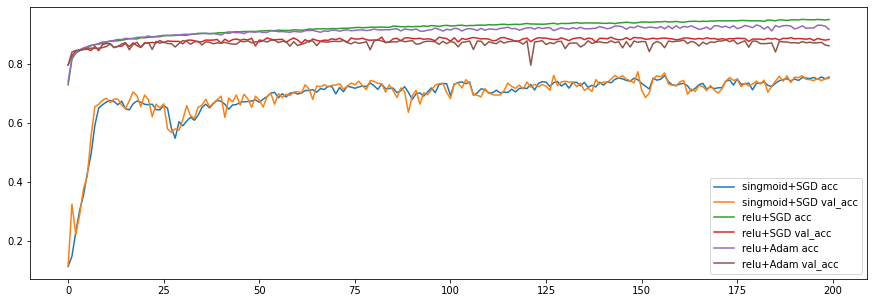

In [9]:
plt.figure(figsize=(15,5))
# singmoid + SGD
plt.plot(h1.history['accuracy'], label='singmoid+SGD acc') # 훈련정확도
plt.plot(h1.history['val_accuracy'], label='singmoid+SGD val_acc') # 검증정확도
#relu + SGD
plt.plot(h2.history['accuracy'], label='relu+SGD acc') # 훈련정확도
plt.plot(h2.history['val_accuracy'], label='relu+SGD val_acc') # 검증정확도
#relu + Adam
plt.plot(h3.history['accuracy'], label='relu+Adam acc') # 훈련정확도
plt.plot(h3.history['val_accuracy'], label='relu+Adam val_acc') # 검증정확도

plt.legend() # 범례
plt.show() # 결과화면 보여주기

#### 모델저장 및 조기학습 중단
- 1 epoch를 마무리하는 시간이 긴 경우가 많다.
- 지정된 횟수까지 기다리는건 시간이 낭비되는 일이다.
- 모델이 과대적방향으로 흘러가서 학습이 마무리되면 그동안의 시간이 무용지물
- 중간중간에 모델을 저장하고, 학습이 더 이상 안될 경우 중단하는 기능을 적용해보자.

In [10]:
# 모델 체크포인트 : 모델 저장을 도와주는 기능
# 모델 저장 경로 설정
model_path = "./myModel_{epoch:02d}_{val_accuracy:.4f}.hdf5"

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [13]:
mkpt = ModelCheckpoint(filepath=model_path, 
                       monitor='val_accuracy', 
                       verbose=1,  # 모델 저장 로그
                       save_best_only=True) 

In [14]:
# 조기학습중단 : 모델 학습을 조기에 중단하는 기능
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
early = EarlyStopping(monitor='val_accuracy',
                      verbose=1,
                      patience=5) # 성능개선 안될시 기다려주는 횟수(그 이내에 개선되면 횟수 리셋, 개선안되면 멈춤)

In [17]:
model = Sequential()
model.add(InputLayer(input_shape=(28,28))) #입력층
model.add(Flatten()) # 데이터를 1차원으로 펴주는 역활
model.add(Dense(units=64, activation='sigmoid'))
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dense(units=256, activation='sigmoid'))
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dense(units=10, activation='softmax')) #출력층(다중분류)
model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
# 'sparse_ : 정답을 확률로 안바꾸더라도 모델 내부에서 틀린정도를 계산해줌(정답원핫인코딩 안해도됨)
h1 = model.fit(X_train,y_train,
               epochs=200,validation_split=0.2,
               callbacks=[mkpt, early])

Epoch 1/200
1483/1500 [============================>.] - ETA: 0s - loss: 2.3026 - accuracy: 0.1130
Epoch 1: val_accuracy improved from -inf to 0.10033, saving model to ./myModel_01_0.1003.hdf5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3025 - accuracy: 0.1131 - val_loss: 2.2944 - val_accuracy: 0.1003
Epoch 2/200
1494/1500 [============================>.] - ETA: 0s - loss: 2.2871 - accuracy: 0.1423
Epoch 2: val_accuracy did not improve from 0.10033
1500/1500 [==============================] - 4s 3ms/step - loss: 2.2870 - accuracy: 0.1421 - val_loss: 2.2757 - val_accuracy: 0.0992
Epoch 3/200
1485/1500 [============================>.] - ETA: 0s - loss: 2.2537 - accuracy: 0.2179
Epoch 3: val_accuracy improved from 0.10033 to 0.27867, saving model to ./myModel_03_0.2787.hdf5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.2534 - accuracy: 0.2183 - val_loss: 2.2137 - val_accuracy: 0.2787
Epoch 4/200
1500/1500 [==============================] - ETA: 